# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = './train.p'
validation_file= './valid.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
print(X_train.shape)

(34799, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd


# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(np.concatenate((y_train, y_valid, y_test))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [30]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

In [73]:
# Show sign key-values
import csv
reader = csv.reader(open('signnames.csv', 'r'))
sign_dict = {}
for k, v in reader:
    try:
        sign_dict[int(k)] = v
    except:
        continue

sign_dict

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

### Sample of each type of sign from training set

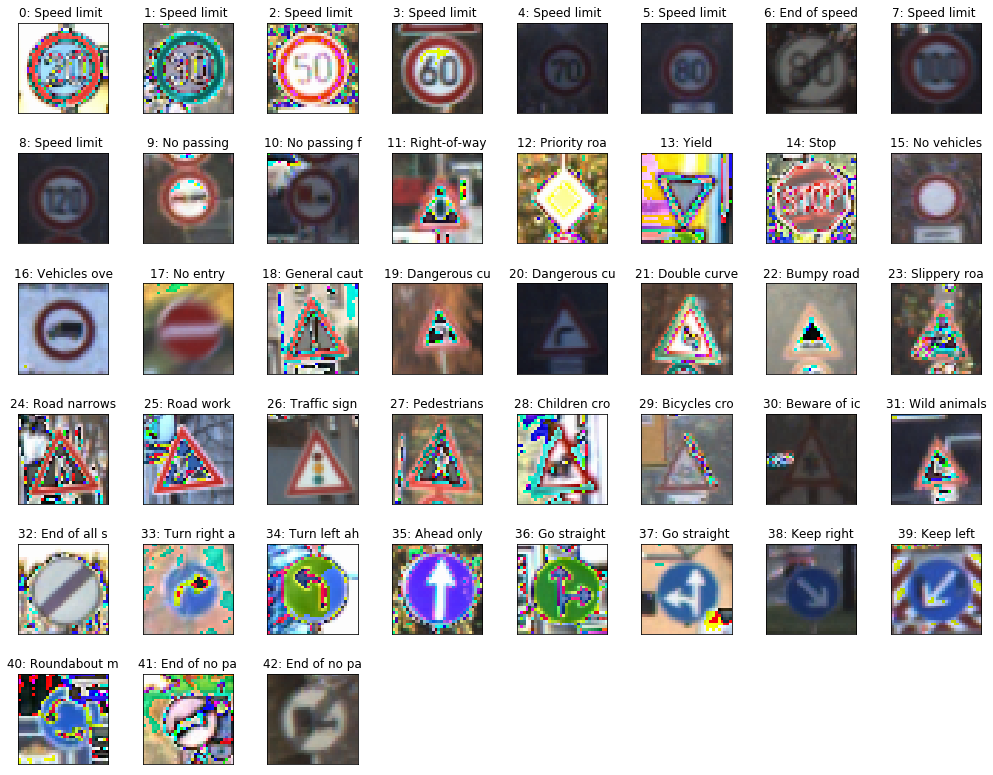

In [74]:
fig = plt.figure(figsize=(14, 11)) #figsize width by height in inches
signs = X_train
labels = y_train

for i in sign_dict.keys():
    label_index = labels.tolist().index(i)
    label = labels[label_index]
    image = signs[label_index]
    sub_plt = fig.add_subplot(6, 8, i+1)
    sub_plt.set_xticks([])
    sub_plt.set_yticks([])
    sub_plt.set_title(str(label) + ': ' + sign_dict[int(label)][:12])
    sub_plt.imshow(image)
    
fig.tight_layout()    
plt.show()

### Distribution of the different types of traffic signs

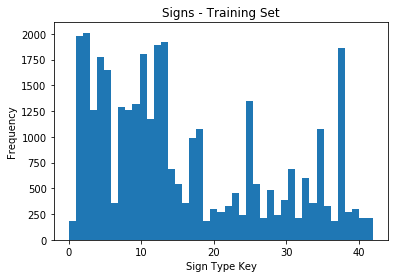

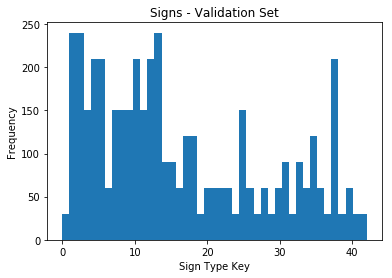

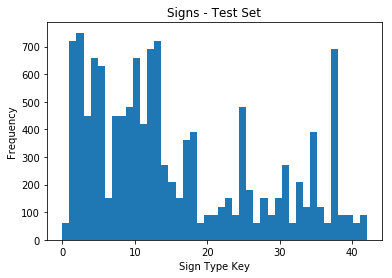

In [31]:

def hist_signs(x, dataset):
    plt.hist(x, bins=n_classes)
    plt.title('Signs - ' + dataset + ' Set', loc='center')
    plt.xlabel('Sign Type Key')
    plt.ylabel('Frequency')
    plt.show()

hist_signs(y_train, 'Training')
hist_signs(y_valid, 'Validation')
hist_signs(y_test, 'Test')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(x):
    #return ((x - 128.0) / 128.0) - 1
    return (x - 128.0) / 128.0
    
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

In [84]:

def D_out(D, F, P, S):
    """
    Helper function to calculate output dimensions
    """
    return ((D - F + 2 * P) / S) + 1

D_out(14, 5, 0, 1)

10.0

### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet5(x):
    """
    Base architecture from LeNet lab.
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 3, 6], mu, sigma)),
    'wc2': tf.Variable(tf.random_normal([5, 5, 6, 16], mu, sigma)),
    'wfc1': tf.Variable(tf.random_normal([5*5*16, 120], mu, sigma)),
    'wfc2': tf.Variable(tf.random_normal([120, 84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([84, n_classes], mu, sigma))}

    biases = {
    'bc1': tf.Variable(tf.random_normal([6], mu, sigma)),
    'bc2': tf.Variable(tf.random_normal([16], mu, sigma)),
    'bfc1': tf.Variable(tf.random_normal([120], mu, sigma)),
    'bfc2': tf.Variable(tf.random_normal([84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([n_classes], mu, sigma))}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv1')
    
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
                        
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits



In [79]:
def LeNet3(x):
    """
    Based on LeNet5 architecture from the lab.
    * Changed convolution kernel (filters) to 3x3.
    * Adjusted subsequent layers' filter sizes to accomodate.
    * Added additional fully connected layer.
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 3, 6], mu, sigma)),
    'wc2': tf.Variable(tf.random_normal([3, 3, 6, 16], mu, sigma)),
    'wfc1': tf.Variable(tf.random_normal([7*7*16, 400], mu, sigma)),
    'wfc2': tf.Variable(tf.random_normal([400, 120], mu, sigma)),    
    'wfc3': tf.Variable(tf.random_normal([120, 84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([84, n_classes], mu, sigma))}

    biases = {
    'bc1': tf.Variable(tf.random_normal([6], mu, sigma)),
    'bc2': tf.Variable(tf.random_normal([16], mu, sigma)),
    'bfc1': tf.Variable(tf.random_normal([400], mu, sigma)),
    'bfc2': tf.Variable(tf.random_normal([120], mu, sigma)),    
    'bfc3': tf.Variable(tf.random_normal([84], mu, sigma)),
    'out': tf.Variable(tf.random_normal([n_classes], mu, sigma))}
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    conv1 = tf.nn.conv2d(x, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='SAME',
                         use_cudnn_on_gpu=True, name='conv1')
    
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 32x32x6. Output = 16x16x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 16x16x16.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
                        
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 16x16x16. Output = 7x7x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 7x7x16. Output = 784.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 784. Output = 120.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    # Activation
    fc2 = tf.nn.relu(fc2)
    
    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc3 = tf.add(tf.matmul(fc2, weights['wfc3']), biases['bfc3'])

    # Activation.
    fc3 = tf.nn.relu(fc3)

    # Layer 6: Fully Connected. Input = 84. Output = 42.
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return logits



In [75]:
def LeNet5_plus(x, keep_prob=0.45):
    """
    Final architecture derived from LeNet5 model with the following modifications:
    
    * Added a "pre-processing" layer at the front, using a 1x1 projection [1, 1, 3, 1]
      to transform the input image to a single layer (channel); same as grayscale image
    * Increased convolution output depths
    * Added an additional fully connected layer.
    * Increased hiddent units in each fully connected layer.
    * Added dropout of 55% for the first fully connected layer 'fc1'
    * Initialized biases with zeroes instead of random_normal
    """
    # Arguments used for tf.truncated_normal, randomly defines
    # variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'wc0': tf.Variable(tf.random_normal([1, 1, 3, 1], mu, sigma)),
        'wc1': tf.Variable(tf.random_normal([5, 5, 1, 20], mu, sigma)),
        'wc2': tf.Variable(tf.random_normal([5, 5, 20, 36], mu, sigma)),
        'wfc1': tf.Variable(tf.random_normal([5*5*36, 1024], mu, sigma)),
        'wfc2': tf.Variable(tf.random_normal([1024, 512], mu, sigma)),
        'wfc3': tf.Variable(tf.random_normal([512, 128], mu, sigma)),    
        'out': tf.Variable(tf.random_normal([128, n_classes], mu, sigma))
    }

    biases = {
        'bc0': tf.Variable(tf.zeros([1])),
        'bc1': tf.Variable(tf.zeros([20])),
        'bc2': tf.Variable(tf.zeros([36])),
        'bfc1': tf.Variable(tf.zeros([1024])),
        'bfc2': tf.Variable(tf.zeros([512])),
        'bfc3': tf.Variable(tf.zeros([128])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }
    
    # "Preprocess" - 1x1 projection to reduce input image to a single layer(channel)
    conv0 = tf.nn.conv2d(x, filter=weights['wc0'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv0')
                        
    conv0 = tf.nn.bias_add(conv0, biases['bc0'])
    conv0 = tf.nn.relu(conv0)
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1 = tf.nn.conv2d(conv0, filter=weights['wc1'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv1')
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
      # Activation.
    conv1 = tf.nn.relu(conv1)
      # Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x36.
    conv2 = tf.nn.conv2d(conv1, filter=weights['wc2'], strides=[1, 1, 1, 1], padding='VALID',
                         use_cudnn_on_gpu=True, name='conv2')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    conv2 = tf.nn.relu(conv2)
      # Pooling. Input = 10x10x36. Output = 5x5x36.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x36. Output = 900.
    fc0 = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 900. Output = 1024.
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
      # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
      # Activation
    fc1 = tf.nn.relu(fc1)
    
    # Layer 4: Fully Connected. Input = 1024. Output = 512.
    fc2 = tf.add(tf.matmul(fc1, weights['wfc2']), biases['bfc2'])
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 512. Output = 128.
    fc3 = tf.add(tf.matmul(fc2, weights['wfc3']), biases['bfc3'])
    fc3 = tf.nn.relu(fc3)
    
    # Layer 6: Fully Connected. Input = 128. Output = 43.
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    return logits


In [17]:
# Placeholders for features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x_features')
y = tf.placeholder(tf.int32, (None), name='y_labels')
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [80]:
###### Training Pipeline ######

learn_rate = 0.001
EPOCHS = 10
BATCH_SIZE = 128

#logits = LeNet5(x)
#logits = LeNet3(x)
logits = LeNet5_plus(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learn_rate)
training_operation = optimizer.minimize(loss_operation)

In [77]:
###### Model Evaluation ######

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [78]:
###### Train the model ######
import time

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    start_t = time.process_time()
    
    for i in range(EPOCHS):
        print("\nEPOCH...{}".format(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            validation_accuracy = evaluate(X_valid, y_valid)
            print("  Batch...{:3d} - Valication accuracy: {:.3f}".format(int(end/BATCH_SIZE), validation_accuracy))
    
    end_t = time.process_time()
    print("\nTotal training time: {}".format(end_t - start_t))
    
    saver.save(sess, './lenet')
    print('\nModel saved.')

Training...

EPOCH...1
  Batch...  1 - Valication accuracy: 0.029
  Batch...  2 - Valication accuracy: 0.042
  Batch...  3 - Valication accuracy: 0.051
  Batch...  4 - Valication accuracy: 0.056
  Batch...  5 - Valication accuracy: 0.058
  Batch...  6 - Valication accuracy: 0.066
  Batch...  7 - Valication accuracy: 0.059
  Batch...  8 - Valication accuracy: 0.068
  Batch...  9 - Valication accuracy: 0.068
  Batch... 10 - Valication accuracy: 0.062
  Batch... 11 - Valication accuracy: 0.070
  Batch... 12 - Valication accuracy: 0.073
  Batch... 13 - Valication accuracy: 0.078
  Batch... 14 - Valication accuracy: 0.072
  Batch... 15 - Valication accuracy: 0.082
  Batch... 16 - Valication accuracy: 0.081
  Batch... 17 - Valication accuracy: 0.084
  Batch... 18 - Valication accuracy: 0.083
  Batch... 19 - Valication accuracy: 0.093
  Batch... 20 - Valication accuracy: 0.089
  Batch... 21 - Valication accuracy: 0.094
  Batch... 22 - Valication accuracy: 0.094
  Batch... 23 - Valication accu

  Batch...191 - Valication accuracy: 0.756
  Batch...192 - Valication accuracy: 0.750
  Batch...193 - Valication accuracy: 0.744
  Batch...194 - Valication accuracy: 0.738
  Batch...195 - Valication accuracy: 0.747
  Batch...196 - Valication accuracy: 0.756
  Batch...197 - Valication accuracy: 0.771
  Batch...198 - Valication accuracy: 0.784
  Batch...199 - Valication accuracy: 0.778
  Batch...200 - Valication accuracy: 0.757
  Batch...201 - Valication accuracy: 0.759
  Batch...202 - Valication accuracy: 0.767
  Batch...203 - Valication accuracy: 0.780
  Batch...204 - Valication accuracy: 0.787
  Batch...205 - Valication accuracy: 0.775
  Batch...206 - Valication accuracy: 0.775
  Batch...207 - Valication accuracy: 0.763
  Batch...208 - Valication accuracy: 0.754
  Batch...209 - Valication accuracy: 0.758
  Batch...210 - Valication accuracy: 0.778
  Batch...211 - Valication accuracy: 0.779
  Batch...212 - Valication accuracy: 0.779
  Batch...213 - Valication accuracy: 0.777
  Batch...2

  Batch...110 - Valication accuracy: 0.868
  Batch...111 - Valication accuracy: 0.862
  Batch...112 - Valication accuracy: 0.873
  Batch...113 - Valication accuracy: 0.863
  Batch...114 - Valication accuracy: 0.866
  Batch...115 - Valication accuracy: 0.868
  Batch...116 - Valication accuracy: 0.873
  Batch...117 - Valication accuracy: 0.878
  Batch...118 - Valication accuracy: 0.879
  Batch...119 - Valication accuracy: 0.883
  Batch...120 - Valication accuracy: 0.884
  Batch...121 - Valication accuracy: 0.878
  Batch...122 - Valication accuracy: 0.870
  Batch...123 - Valication accuracy: 0.859
  Batch...124 - Valication accuracy: 0.859
  Batch...125 - Valication accuracy: 0.864
  Batch...126 - Valication accuracy: 0.868
  Batch...127 - Valication accuracy: 0.870
  Batch...128 - Valication accuracy: 0.870
  Batch...129 - Valication accuracy: 0.865
  Batch...130 - Valication accuracy: 0.857
  Batch...131 - Valication accuracy: 0.860
  Batch...132 - Valication accuracy: 0.870
  Batch...1

  Batch... 29 - Valication accuracy: 0.899
  Batch... 30 - Valication accuracy: 0.900
  Batch... 31 - Valication accuracy: 0.906
  Batch... 32 - Valication accuracy: 0.895
  Batch... 33 - Valication accuracy: 0.895
  Batch... 34 - Valication accuracy: 0.893
  Batch... 35 - Valication accuracy: 0.898
  Batch... 36 - Valication accuracy: 0.904
  Batch... 37 - Valication accuracy: 0.908
  Batch... 38 - Valication accuracy: 0.910
  Batch... 39 - Valication accuracy: 0.904
  Batch... 40 - Valication accuracy: 0.901
  Batch... 41 - Valication accuracy: 0.899
  Batch... 42 - Valication accuracy: 0.901
  Batch... 43 - Valication accuracy: 0.902
  Batch... 44 - Valication accuracy: 0.898
  Batch... 45 - Valication accuracy: 0.905
  Batch... 46 - Valication accuracy: 0.907
  Batch... 47 - Valication accuracy: 0.909
  Batch... 48 - Valication accuracy: 0.907
  Batch... 49 - Valication accuracy: 0.904
  Batch... 50 - Valication accuracy: 0.910
  Batch... 51 - Valication accuracy: 0.907
  Batch... 

  Batch...220 - Valication accuracy: 0.914
  Batch...221 - Valication accuracy: 0.912
  Batch...222 - Valication accuracy: 0.915
  Batch...223 - Valication accuracy: 0.912
  Batch...224 - Valication accuracy: 0.916
  Batch...225 - Valication accuracy: 0.917
  Batch...226 - Valication accuracy: 0.917
  Batch...227 - Valication accuracy: 0.912
  Batch...228 - Valication accuracy: 0.913
  Batch...229 - Valication accuracy: 0.914
  Batch...230 - Valication accuracy: 0.914
  Batch...231 - Valication accuracy: 0.915
  Batch...232 - Valication accuracy: 0.915
  Batch...233 - Valication accuracy: 0.916
  Batch...234 - Valication accuracy: 0.914
  Batch...235 - Valication accuracy: 0.913
  Batch...236 - Valication accuracy: 0.911
  Batch...237 - Valication accuracy: 0.905
  Batch...238 - Valication accuracy: 0.908
  Batch...239 - Valication accuracy: 0.909
  Batch...240 - Valication accuracy: 0.919
  Batch...241 - Valication accuracy: 0.915
  Batch...242 - Valication accuracy: 0.915
  Batch...2

  Batch...139 - Valication accuracy: 0.922
  Batch...140 - Valication accuracy: 0.921
  Batch...141 - Valication accuracy: 0.917
  Batch...142 - Valication accuracy: 0.922
  Batch...143 - Valication accuracy: 0.922
  Batch...144 - Valication accuracy: 0.922
  Batch...145 - Valication accuracy: 0.921
  Batch...146 - Valication accuracy: 0.927
  Batch...147 - Valication accuracy: 0.922
  Batch...148 - Valication accuracy: 0.922
  Batch...149 - Valication accuracy: 0.916
  Batch...150 - Valication accuracy: 0.916
  Batch...151 - Valication accuracy: 0.917
  Batch...152 - Valication accuracy: 0.917
  Batch...153 - Valication accuracy: 0.922
  Batch...154 - Valication accuracy: 0.923
  Batch...155 - Valication accuracy: 0.915
  Batch...156 - Valication accuracy: 0.920
  Batch...157 - Valication accuracy: 0.917
  Batch...158 - Valication accuracy: 0.915
  Batch...159 - Valication accuracy: 0.914
  Batch...160 - Valication accuracy: 0.912
  Batch...161 - Valication accuracy: 0.913
  Batch...1

  Batch... 58 - Valication accuracy: 0.902
  Batch... 59 - Valication accuracy: 0.907
  Batch... 60 - Valication accuracy: 0.909
  Batch... 61 - Valication accuracy: 0.909
  Batch... 62 - Valication accuracy: 0.910
  Batch... 63 - Valication accuracy: 0.907
  Batch... 64 - Valication accuracy: 0.908
  Batch... 65 - Valication accuracy: 0.914
  Batch... 66 - Valication accuracy: 0.915
  Batch... 67 - Valication accuracy: 0.917
  Batch... 68 - Valication accuracy: 0.918
  Batch... 69 - Valication accuracy: 0.918
  Batch... 70 - Valication accuracy: 0.918
  Batch... 71 - Valication accuracy: 0.918
  Batch... 72 - Valication accuracy: 0.913
  Batch... 73 - Valication accuracy: 0.912
  Batch... 74 - Valication accuracy: 0.920
  Batch... 75 - Valication accuracy: 0.919
  Batch... 76 - Valication accuracy: 0.918
  Batch... 77 - Valication accuracy: 0.915
  Batch... 78 - Valication accuracy: 0.916
  Batch... 79 - Valication accuracy: 0.917
  Batch... 80 - Valication accuracy: 0.920
  Batch... 

  Batch...249 - Valication accuracy: 0.929
  Batch...250 - Valication accuracy: 0.927
  Batch...251 - Valication accuracy: 0.930
  Batch...252 - Valication accuracy: 0.928
  Batch...253 - Valication accuracy: 0.920
  Batch...254 - Valication accuracy: 0.927
  Batch...255 - Valication accuracy: 0.926
  Batch...256 - Valication accuracy: 0.932
  Batch...257 - Valication accuracy: 0.931
  Batch...258 - Valication accuracy: 0.932
  Batch...259 - Valication accuracy: 0.930
  Batch...260 - Valication accuracy: 0.929
  Batch...261 - Valication accuracy: 0.930
  Batch...262 - Valication accuracy: 0.931
  Batch...263 - Valication accuracy: 0.935
  Batch...264 - Valication accuracy: 0.932
  Batch...265 - Valication accuracy: 0.929
  Batch...266 - Valication accuracy: 0.930
  Batch...267 - Valication accuracy: 0.929
  Batch...268 - Valication accuracy: 0.925
  Batch...269 - Valication accuracy: 0.927
  Batch...270 - Valication accuracy: 0.931
  Batch...271 - Valication accuracy: 0.926
  Batch...2

  Batch...168 - Valication accuracy: 0.933
  Batch...169 - Valication accuracy: 0.931
  Batch...170 - Valication accuracy: 0.931
  Batch...171 - Valication accuracy: 0.930
  Batch...172 - Valication accuracy: 0.931
  Batch...173 - Valication accuracy: 0.933
  Batch...174 - Valication accuracy: 0.926
  Batch...175 - Valication accuracy: 0.928
  Batch...176 - Valication accuracy: 0.926
  Batch...177 - Valication accuracy: 0.923
  Batch...178 - Valication accuracy: 0.926
  Batch...179 - Valication accuracy: 0.935
  Batch...180 - Valication accuracy: 0.927
  Batch...181 - Valication accuracy: 0.932
  Batch...182 - Valication accuracy: 0.930
  Batch...183 - Valication accuracy: 0.927
  Batch...184 - Valication accuracy: 0.928
  Batch...185 - Valication accuracy: 0.931
  Batch...186 - Valication accuracy: 0.927
  Batch...187 - Valication accuracy: 0.928
  Batch...188 - Valication accuracy: 0.927
  Batch...189 - Valication accuracy: 0.932
  Batch...190 - Valication accuracy: 0.934
  Batch...1

  Batch... 87 - Valication accuracy: 0.935
  Batch... 88 - Valication accuracy: 0.936
  Batch... 89 - Valication accuracy: 0.936
  Batch... 90 - Valication accuracy: 0.932
  Batch... 91 - Valication accuracy: 0.931
  Batch... 92 - Valication accuracy: 0.934
  Batch... 93 - Valication accuracy: 0.930
  Batch... 94 - Valication accuracy: 0.929
  Batch... 95 - Valication accuracy: 0.926
  Batch... 96 - Valication accuracy: 0.928
  Batch... 97 - Valication accuracy: 0.927
  Batch... 98 - Valication accuracy: 0.931
  Batch... 99 - Valication accuracy: 0.930
  Batch...100 - Valication accuracy: 0.930
  Batch...101 - Valication accuracy: 0.928
  Batch...102 - Valication accuracy: 0.934
  Batch...103 - Valication accuracy: 0.938
  Batch...104 - Valication accuracy: 0.931
  Batch...105 - Valication accuracy: 0.934
  Batch...106 - Valication accuracy: 0.934
  Batch...107 - Valication accuracy: 0.931
  Batch...108 - Valication accuracy: 0.931
  Batch...109 - Valication accuracy: 0.931
  Batch...1

  Batch...  6 - Valication accuracy: 0.921
  Batch...  7 - Valication accuracy: 0.923
  Batch...  8 - Valication accuracy: 0.925
  Batch...  9 - Valication accuracy: 0.924
  Batch... 10 - Valication accuracy: 0.924
  Batch... 11 - Valication accuracy: 0.924
  Batch... 12 - Valication accuracy: 0.920
  Batch... 13 - Valication accuracy: 0.923
  Batch... 14 - Valication accuracy: 0.929
  Batch... 15 - Valication accuracy: 0.924
  Batch... 16 - Valication accuracy: 0.931
  Batch... 17 - Valication accuracy: 0.934
  Batch... 18 - Valication accuracy: 0.931
  Batch... 19 - Valication accuracy: 0.929
  Batch... 20 - Valication accuracy: 0.930
  Batch... 21 - Valication accuracy: 0.929
  Batch... 22 - Valication accuracy: 0.926
  Batch... 23 - Valication accuracy: 0.926
  Batch... 24 - Valication accuracy: 0.926
  Batch... 25 - Valication accuracy: 0.929
  Batch... 26 - Valication accuracy: 0.927
  Batch... 27 - Valication accuracy: 0.929
  Batch... 28 - Valication accuracy: 0.928
  Batch... 

  Batch...197 - Valication accuracy: 0.932
  Batch...198 - Valication accuracy: 0.930
  Batch...199 - Valication accuracy: 0.932
  Batch...200 - Valication accuracy: 0.924
  Batch...201 - Valication accuracy: 0.922
  Batch...202 - Valication accuracy: 0.922
  Batch...203 - Valication accuracy: 0.929
  Batch...204 - Valication accuracy: 0.932
  Batch...205 - Valication accuracy: 0.928
  Batch...206 - Valication accuracy: 0.926
  Batch...207 - Valication accuracy: 0.923
  Batch...208 - Valication accuracy: 0.916
  Batch...209 - Valication accuracy: 0.926
  Batch...210 - Valication accuracy: 0.925
  Batch...211 - Valication accuracy: 0.927
  Batch...212 - Valication accuracy: 0.927
  Batch...213 - Valication accuracy: 0.926
  Batch...214 - Valication accuracy: 0.923
  Batch...215 - Valication accuracy: 0.924
  Batch...216 - Valication accuracy: 0.922
  Batch...217 - Valication accuracy: 0.922
  Batch...218 - Valication accuracy: 0.924
  Batch...219 - Valication accuracy: 0.926
  Batch...2

  Batch...116 - Valication accuracy: 0.933
  Batch...117 - Valication accuracy: 0.933
  Batch...118 - Valication accuracy: 0.933
  Batch...119 - Valication accuracy: 0.932
  Batch...120 - Valication accuracy: 0.936
  Batch...121 - Valication accuracy: 0.938
  Batch...122 - Valication accuracy: 0.937
  Batch...123 - Valication accuracy: 0.931
  Batch...124 - Valication accuracy: 0.937
  Batch...125 - Valication accuracy: 0.934
  Batch...126 - Valication accuracy: 0.935
  Batch...127 - Valication accuracy: 0.931
  Batch...128 - Valication accuracy: 0.934
  Batch...129 - Valication accuracy: 0.933
  Batch...130 - Valication accuracy: 0.935
  Batch...131 - Valication accuracy: 0.939
  Batch...132 - Valication accuracy: 0.940
  Batch...133 - Valication accuracy: 0.938
  Batch...134 - Valication accuracy: 0.939
  Batch...135 - Valication accuracy: 0.936
  Batch...136 - Valication accuracy: 0.935
  Batch...137 - Valication accuracy: 0.933
  Batch...138 - Valication accuracy: 0.932
  Batch...1

  Batch... 35 - Valication accuracy: 0.934
  Batch... 36 - Valication accuracy: 0.937
  Batch... 37 - Valication accuracy: 0.932
  Batch... 38 - Valication accuracy: 0.928
  Batch... 39 - Valication accuracy: 0.926
  Batch... 40 - Valication accuracy: 0.928
  Batch... 41 - Valication accuracy: 0.921
  Batch... 42 - Valication accuracy: 0.922
  Batch... 43 - Valication accuracy: 0.923
  Batch... 44 - Valication accuracy: 0.920
  Batch... 45 - Valication accuracy: 0.925
  Batch... 46 - Valication accuracy: 0.927
  Batch... 47 - Valication accuracy: 0.932
  Batch... 48 - Valication accuracy: 0.934
  Batch... 49 - Valication accuracy: 0.933
  Batch... 50 - Valication accuracy: 0.938
  Batch... 51 - Valication accuracy: 0.937
  Batch... 52 - Valication accuracy: 0.935
  Batch... 53 - Valication accuracy: 0.936
  Batch... 54 - Valication accuracy: 0.941
  Batch... 55 - Valication accuracy: 0.938
  Batch... 56 - Valication accuracy: 0.937
  Batch... 57 - Valication accuracy: 0.939
  Batch... 

  Batch...226 - Valication accuracy: 0.937
  Batch...227 - Valication accuracy: 0.941
  Batch...228 - Valication accuracy: 0.939
  Batch...229 - Valication accuracy: 0.944
  Batch...230 - Valication accuracy: 0.943
  Batch...231 - Valication accuracy: 0.941
  Batch...232 - Valication accuracy: 0.942
  Batch...233 - Valication accuracy: 0.941
  Batch...234 - Valication accuracy: 0.939
  Batch...235 - Valication accuracy: 0.943
  Batch...236 - Valication accuracy: 0.940
  Batch...237 - Valication accuracy: 0.944
  Batch...238 - Valication accuracy: 0.944
  Batch...239 - Valication accuracy: 0.939
  Batch...240 - Valication accuracy: 0.938
  Batch...241 - Valication accuracy: 0.945
  Batch...242 - Valication accuracy: 0.935
  Batch...243 - Valication accuracy: 0.937
  Batch...244 - Valication accuracy: 0.936
  Batch...245 - Valication accuracy: 0.935
  Batch...246 - Valication accuracy: 0.936
  Batch...247 - Valication accuracy: 0.940
  Batch...248 - Valication accuracy: 0.938
  Batch...2

### Training Notes

| Iteration | Model (function) | Learn rate | Epochs | Batch size | Validation accuracy | Total training time | Notes                                                                                                                            |
|----------:|:-----------------|:-----------|:------:|:----------:|:-------------------:|--------------------:|:---------------------------------------------------------------------------------------------------------------------------------|
|         1 | LeNet5           |      0.001 |   10   |     128    |               0.737 |           419.998 s |                                                                                                                                  |
|         2 | LeNet5           |      0.001 |   15   |     256    |               0.725 |                   - | Changing epochs and batch size showed no improvement in accuracy                                                                 |
|         3 | LeNet5           |     0.0001 |   20   |     256    |               0.561 |           789.800 s | Decreasing the learning rate to 0.0001 slowed down the training too much, resulting in accuracy of only 0.561 after 20 epochs.   |
|         4 | LeNet5           |      0.001 |   10   |     128    |               0.894 |           409.572 s | Fixed input normalization in preprocessing from (x - 128) / 128 to ((x - 128.0) / 128.0)                                     |
|         5 | LeNet3           |      0.001 |   10   |     128    |               0.869 |           442.429 s | Updated model to have smaller kernel size of 3x3 for convolution layers. Accuracy reduced a bit to 0.869                         |
|         6 | LeNet3           |      0.001 |   10   |     128    |               0.864 |           465.583 s | Updated 3x3 kernel model by adding an additional fully connected layer. Accuracy ended at 0.864                                  |
|         7 | LeNet5_plus      |      0.001 |   10   |     128    |               0.917 |           382.130 s | Revisited LeNet5 with 5x5 kernel for convolution layers. Added additional fully connected layer and resulted in accuracy of 0.917 |
|         8 | LeNet5_plus      |      0.005 |   10   |     128    |               0.880 |           412.327 s | Added 25% dropout to fully connected layers. Increased learning rate to 0.005                                                        |
|         9 | LeNet5_plus      |      0.001 |   10   |     256    |               0.866 |          6319.714 s | Removed dropouts to fully connected layers. Set learning rate back to 0.001. The training time looks way too long; I know I didn't sit and wait for 1.75 hours b/c I monitored it to completion. |
|        10 | LeNet5_plus      |      0.001 |   10   |     128    |               0.797 |           491.281 s | Added initial convolution layer with filter [1, 1, 3, 1] to let the network learn a 1-output grayscale layer before training continues. This should be equivalent to preprocessing the images by first converting them to grayscale. |
|        11 | LeNet5_plus      |      0.001 |   10   |     128    |               0.895 |           476.808 s | **Initialized biases with zeros instead of random_normal.** |
|        12 | LeNet5_plus      |      0.001 |   10   |     128    |               0.745 |           503.033 s | Add 50% dropout to first fully connected layer. |
|        13 | LeNet5_plus      |      0.001 |   10   |     128    |               0.922 |           501.152 s | Increased hidden units for the fully connected layers to 1024, 512, 256 |
|        14 | LeNet5_plus      |      0.001 |   10   |     128    |               **0.939** |           751.795 s | Increased depth of convolution layers. Dropout rate set to 55% (keep_prob=0.45). Fully connected layers' hidden units changed to 1024, 512, 128 |

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")